In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#importing the  dataset
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
#Checking the data types of all columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
#Checking shapes of dataset
df.shape

(907, 27)

There are 907 rows and 27 columns in total in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

we are able to observe in the columns

other_fuel3,
wepp_id,
generation_gwh_2013,
generation_gwh_2019,
estimated_generation_gwh

has all null values.so we can drop these columns as it has no meaning to the model. 

we can see in the column other_fuel2 has only one non null values and rest are null values.So we can also drop that column as well,as it will have no relation with the model.

In [9]:
#Droping unnecessary columns
df.drop(columns=['other_fuel3','wepp_id','generation_gwh_2013',
                 'generation_gwh_2019','estimated_generation_gwh','other_fuel2'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [11]:

df.country.nunique()

1

In [12]:
df.country_long.nunique()

1

In [13]:
df.generation_data_source.nunique()

1

In [14]:
df.drop(columns=['country','country_long','generation_data_source'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   907 non-null    object 
 1   gppd_idnr              907 non-null    object 
 2   capacity_mw            907 non-null    float64
 3   latitude               861 non-null    float64
 4   longitude              861 non-null    float64
 5   primary_fuel           907 non-null    object 
 6   other_fuel1            198 non-null    object 
 7   commissioning_year     527 non-null    float64
 8   owner                  342 non-null    object 
 9   source                 907 non-null    object 
 10  url                    907 non-null    object 
 11  geolocation_source     888 non-null    object 
 12  year_of_capacity_data  519 non-null    float64
 13  generation_gwh_2014    398 non-null    float64
 14  generation_gwh_2015    422 non-null    float64
 15  genera

In [16]:

#lets check count in the name column 
df['name'].nunique()

907

we can see all the rows in the column are unique values ,we can drop this column as well

In [17]:
df['gppd_idnr'].nunique()

907

we can see all the rows in the column are unique values ,we can drop this column as well

In [18]:
df['url'].nunique()

304

In [19]:
df['url'].value_counts()

http://www.cea.nic.in/                                                                                                                                                                                                                            519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                                                                                                                                                     7
http://www.ntpc.co.in                                                                                                                                                                                                                               6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                                                                                                                                                    5
http://www.mahau

we can drop this column as well as this column wont have any input for prediction in the model

In [20]:
df["owner"].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

we can drop this column as well as this column wont have any any input for prediction in the model

In [21]:
#dropping unwanted columns
df.drop(columns=['name','gppd_idnr','owner'],axis=1,inplace=True)

In [22]:
df.drop('url',axis=1,inplace=True)

In [23]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.500,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.000,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.200,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.000,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.000,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.000,23.7689,68.6447,Coal,Oil,2005.0,Central Electricity Authority,WRI,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.000,10.4547,77.0078,Hydro,NaN,1970.0,Central Electricity Authority,WRI,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.000,32.2258,77.2070,Hydro,NaN,2010.0,Central Electricity Authority,WRI,2019.0,674.391100,721.335200,675.724400,679.594950,579.318850
8,290.000,16.3300,75.8863,Hydro,NaN,2004.0,Central Electricity Authority,WRI,2019.0,480.594950,144.434200,402.029750,439.372100,406.377900
9,210.000,23.1642,81.6373,Coal,Oil,2008.0,Central Electricity Authority,WRI,2019.0,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000


# Null values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            907 non-null    float64
 1   latitude               861 non-null    float64
 2   longitude              861 non-null    float64
 3   primary_fuel           907 non-null    object 
 4   other_fuel1            198 non-null    object 
 5   commissioning_year     527 non-null    float64
 6   source                 907 non-null    object 
 7   geolocation_source     888 non-null    object 
 8   year_of_capacity_data  519 non-null    float64
 9   generation_gwh_2014    398 non-null    float64
 10  generation_gwh_2015    422 non-null    float64
 11  generation_gwh_2016    434 non-null    float64
 12  generation_gwh_2017    440 non-null    float64
 13  generation_gwh_2018    448 non-null    float64
dtypes: float64(10), object(4)
memory usage: 99.3+ KB


In [25]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1              709
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

we can also drop the column other_fuel1 as it contains only 198 values rest are null values.


In [26]:
#dropping the  columns with null values
df.drop(columns=['other_fuel1'],axis=1,inplace=True)

In [27]:
df.year_of_capacity_data.nunique()

1

In [28]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [29]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

# lets fill the null values


In [30]:
#Replacing NaN values in numerical columns
df.latitude  =  df.latitude.fillna(df.latitude.mode()[0])

df.commissioning_year = df.commissioning_year.fillna(df.commissioning_year.median())
df.year_of_capacity_data = df.year_of_capacity_data.fillna(df.year_of_capacity_data.median())
df.geolocation_source = df.geolocation_source.fillna(df.geolocation_source.mode()[0])     

In [31]:
df.longitude  =  df.longitude.fillna(df.longitude.mode()[0])

In [32]:
df.generation_gwh_2014 = df.generation_gwh_2014.fillna(df.generation_gwh_2014.median())
df.generation_gwh_2015 = df.generation_gwh_2015.fillna(df.generation_gwh_2015.median())
df.generation_gwh_2016 = df.generation_gwh_2016.fillna(df.generation_gwh_2016.median())
df.generation_gwh_2017 = df.generation_gwh_2017.fillna(df.generation_gwh_2017.median())
df.generation_gwh_2018 = df.generation_gwh_2018.fillna(df.generation_gwh_2018.median())

In [33]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

lets try to get a difference of commisioning year and the year of capacity column 'Years_of_Operation'  and create a new column which will give meaningful data

In [34]:
df['Years_of_Operation']=(df.year_of_capacity_data)-(df.commissioning_year)

now lets frop the commissioning_year and year_of_capacity_data as we have the combined meaningful data from Years_of_Operation column 

In [35]:
#dropping the  columns 
df.drop(columns=['commissioning_year'],axis=1,inplace=True)

In [36]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [37]:
df['average_production_2013-2017']=(df['generation_gwh_2014']+df['generation_gwh_2015']+df['generation_gwh_2016']+df['generation_gwh_2017']+df['generation_gwh_2018'])/5


In [38]:
df.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis=1,inplace=True)

In [39]:
start

NameError: name 'start' is not defined

# we have successfully removed all the columns with empty rows and treated the null calues adequately  

In [ ]:
df

In [ ]:
df.describe()

There is a huge difference in mean and 2nd quantile of capacity_mw column which means there are extream outliers in the column.

In [ ]:
df.describe(include='O')

In [ ]:
df.shape

we have 907 rows and 7 columns after treating the datasets.

In [ ]:
#Visualising null values
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [ ]:
#count of each data classes in the dataset

In [ ]:
df.capacity_mw.nunique()

we have 361 unique capacity_mw in the dataset.

In [ ]:
df.latitude.nunique()

In [ ]:
df.longitude.nunique()

In [ ]:
df.primary_fuel.nunique()

In [ ]:
df.Years_of_Operation.nunique()

In [ ]:
df.source.nunique()

In [ ]:
df.geolocation_source.nunique()

In [ ]:
labl='Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil','Nuclear'
plt.figure(figsize=(10,7))
plt.pie(df.primary_fuel.value_counts(), labels=labl, autopct='%1.2f%%', shadow=True);

In [ ]:
labl=[2011., 2001., 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2006., 2007., 1988., 1973.,
       2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971., 1955.,
       2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982., 1937.,
       1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927., 1974.,
       1953.]
plt.figure(figsize=(18,10))
plt.pie(df.commissioning_year.value_counts(), labels=labl, autopct='%1.2f%%', shadow=True);

In [ ]:
df.geolocation_source.unique()

In [ ]:
labl='WRI', 'Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(10,7))
plt.pie(df.geolocation_source.value_counts(), labels=labl, autopct='%1.2f%%', shadow=True);

In [ ]:
df.geolocation_source.value_counts()

In [ ]:
#Count plot for other_fuel1
sns.countplot(df.capacity_mw)

In [ ]:
start

# Encoding

In [40]:
catg=['primary_fuel','source','geolocation_source']

In [41]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[catg]= df[catg].apply(LE.fit_transform)

In [42]:
columns=df.columns

In [ ]:
#Distribution plot for all numerical columns
sns.distplot(df['capacity_mw'], bins = 10, color="indigo")

In [ ]:
df.head(100)

In [ ]:
sns.distplot(df['latitude'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['longitude'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['primary_fuel'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['Years_of_Operation'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['source'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['url'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['geolocation_source'], bins = 10, color="indigo")

In [ ]:
df.columns

# Detecting Outliers

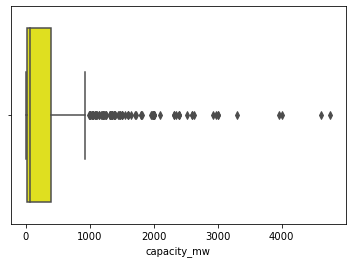

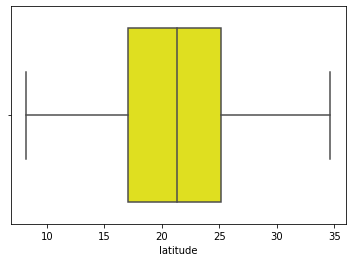

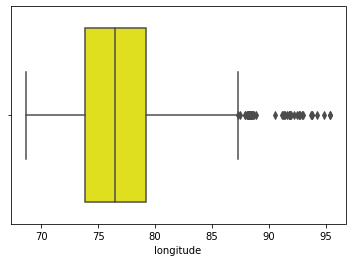

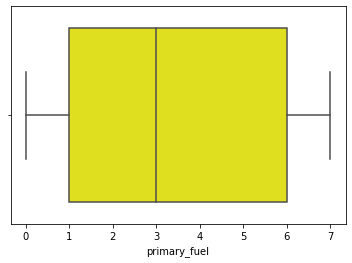

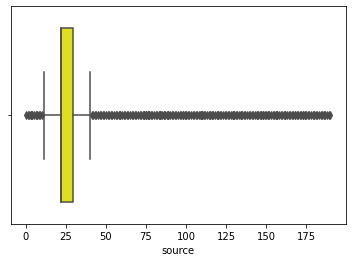

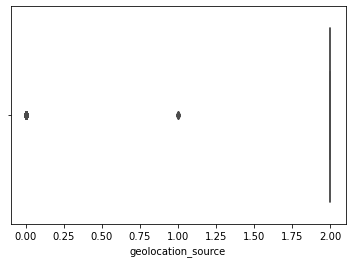

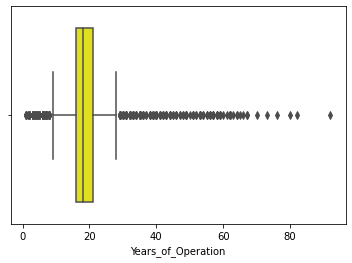

In [43]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],data=df,color='yellow')
for i in range(0,7):
    bxplt(i)

In [ ]:
start

# Removing outliers

In [ ]:
#zscore

z=np.abs(zscore(df))
z

In [ ]:
#printing the outliers points in the dataset
threshold=3
print(np.where(z>3))

In [ ]:
#saving the data without outlier points 
df_new=df[(z<3).all(axis=1)]

In [ ]:
#number of rows in df_new
df_new.shape[0]

In [ ]:
#chcking data loss
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
print(data_loss)

since the data loss is less than 10% we can go ahead with this dataset

# Skewness Removal

In [44]:
#initialising X and y
X=df.drop(['capacity_mw'],axis=1)
y=df.capacity_mw

In [45]:
X.skew()

latitude                       -0.095721
longitude                       1.130252
primary_fuel                    0.472251
source                          1.827373
geolocation_source             -2.159841
Years_of_Operation              1.719575
average_production_2013-2017    5.381489
dtype: float64

we can observe skewness in columns commissioning_year,longitude and the skewness can be ignored in the categorical columns

In [46]:
feat=['Years_of_Operation','longitude','average_production_2013-2017']
from sklearn.preprocessing import PowerTransformer
X[feat]=PowerTransformer(method='yeo-johnson').fit_transform(X[feat])

In [47]:
X[feat].skew()

Years_of_Operation              0.040753
longitude                       0.040507
average_production_2013-2017    0.191021
dtype: float64

the skewness is treated lets move with the dataset

# Scaling the data

In [48]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

# checking multicollinearity

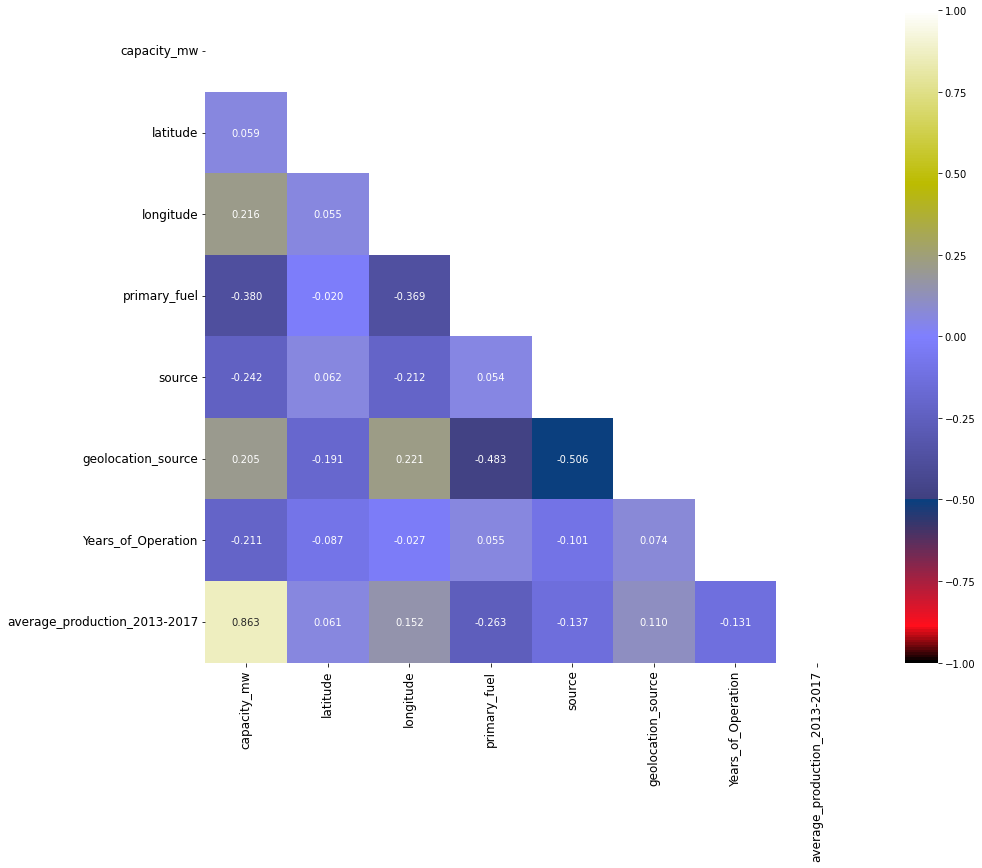

In [49]:
df_cor=df.corr()
upper_triangle = np.triu(df_cor)
plt.figure(figsize=(17,12))
sns.heatmap(df_cor, vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,1.076281,latitude
1,1.277195,longitude
2,1.766206,primary_fuel
3,1.518855,source
4,2.003653,geolocation_source
5,1.063576,Years_of_Operation
6,1.101667,average_production_2013-2017


the vif is less than 10.There is no multicollinearity found.

# Model Building

In [51]:
#X,y already initialized
X.head()

,latitude,longitude,primary_fuel,source,geolocation_source,Years_of_Operation,average_production_2013-2017
0,1.164487,-0.826776,1.225688,1.460215,-1.083349,-1.067275,-0.087452
1,0.603756,-0.431719,-0.967877,2.917019,0.394241,0.020160,-0.087452
2,0.134101,-2.231264,1.664401,-0.512075,0.394241,0.020160,-0.087452
3,0.456896,2.106601,-0.529164,-0.489662,0.394241,-0.252223,-0.126803
4,0.143371,1.144191,-0.967877,-0.489662,0.394241,-1.765116,1.777924


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [53]:

# different algorithm going to use

lr=LinearRegression()
ls=Lasso()
Rd=Ridge()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor(n_estimators=100)
adr=AdaBoostRegressor(n_estimators=100)
knn=KNeighborsRegressor()
gbr=GradientBoostingRegressor()

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2=r2_score(y_test,predlr)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.7000460533486051  on random_state  98


In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=98)

In [69]:
# different algorithm going to use

lr=LinearRegression()
ls=Lasso()
Rd=Ridge()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor(n_estimators=100)
adr=AdaBoostRegressor(n_estimators=100)
knn=KNeighborsRegressor()
gbr=GradientBoostingRegressor()

In [70]:
#code for Training and Prediction for linear,lasso,Ridge regression
def evaluate(x):
    mod=x
    mod.fit(x_train,y_train)
    pred_train=mod.predict(x_train)
    pred_test=mod.predict(x_test)
    

    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred_test)*100),"\n")
    print("intercept is : ",mod.intercept_,"\n")
    print("Coefficient is  : ",mod.coef_,"\n")
    print("Score of trained data :",mod.score(x_train,y_train)*100,"\n")
    print("Score of test data :",mod.score(x_test,y_test)*100,"\n")
    
    print("Error")
    print("mean absolute error is : ",mean_absolute_error(y_test,pred_test))
    print("mean squared error is: ",mean_squared_error(y_test,pred_test))
    print("root mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred_test)))
    plt.scatter(x=y_test,y=pred_test,color='r')
    plt.plot(y_test,y_test,color='b')

In [71]:
#code for Training and Prediction for other models

def eval(x):
    mod=x
    print(mod)
    #training the data
    mod.fit(x_train,y_train)
    #Predicting the data
    pred_train=mod.predict(x_train)
    pred=mod.predict(x_test)
    
    print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100))
    print("\n")
    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred)*100))
    
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred))
    print("mean squared error : ",mean_squared_error(y_test,pred))
    print("mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred)))
    plt.scatter(x=y_test,y=pred,color='r')
    plt.plot(y_test,y_test,color='b')

r2_score for  test data is  70.00% 

intercept is :  336.39745470635916 

Coefficient is  :  [ -19.05366523   -1.49403953 -155.17856102 -139.36322537  -43.32638621
  -71.80555338  356.61199007] 

Score of trained data : 56.659874709034355 

Score of test data : 70.00460533486051 

Error
mean absolute error is :  245.9994339406223
mean squared error is:  107857.23468378514
root mean squared error is:  328.4162521614683


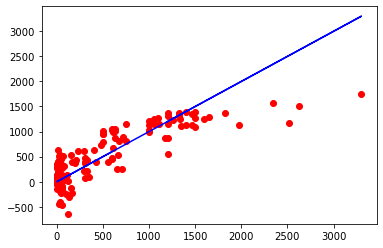

In [72]:
#calling linear model
evaluate(lr)


DecisionTreeRegressor()
r2_score for train data is 99.99%


r2_score for  test data is  75.45%


Error
mean absolute error :  159.80028296703296
mean squared error :  88267.47138686676
mean squared error is:  297.098420370871


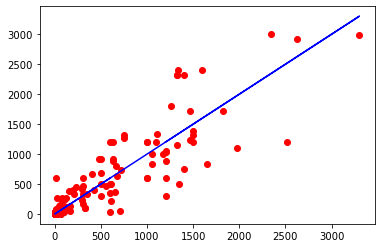

In [73]:
#calling DecisionTreeRegressor model
eval(dtr)

RandomForestRegressor()
r2_score for train data is 97.67%


r2_score for  test data is  84.93%


Error
mean absolute error :  134.926777751491
mean squared error :  54180.296147900866
mean squared error is:  232.76661304384027


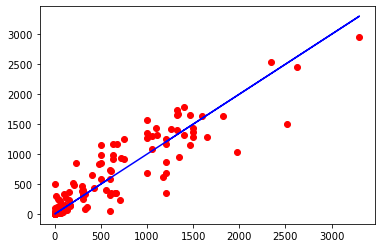

In [74]:
# RandomForestRegressor model
eval(rfr)

AdaBoostRegressor(n_estimators=100)
r2_score for train data is 75.80%


r2_score for  test data is  71.01%


Error
mean absolute error :  283.5600947564188
mean squared error :  104241.5201196719
mean squared error is:  322.86455382973196


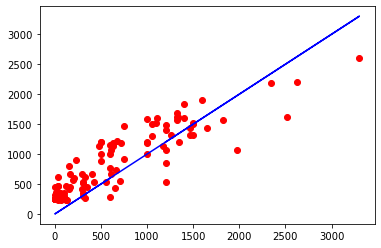

In [75]:
#calling AdaBoostRegressor model
eval(adr)

KNeighborsRegressor()
r2_score for train data is 84.30%


r2_score for  test data is  86.05%


Error
mean absolute error :  135.22731758241758
mean squared error :  50164.4587544112
mean squared error is:  223.97423680952951


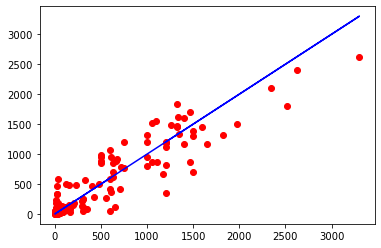

In [76]:
#calling KNeighborsRegressor model
eval(knn)

GradientBoostingRegressor()
r2_score for train data is 95.68%


r2_score for  test data is  88.15%


Error
mean absolute error :  117.96489256475294
mean squared error :  42607.33845084758
mean squared error is:  206.4154510952307


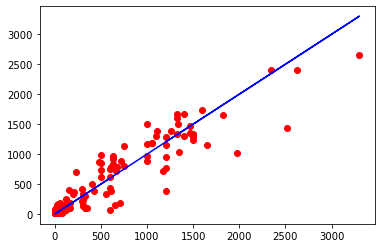

In [77]:
#calling GradientBoostingRegressor model
eval(gbr)

In [78]:
from numpy import absolute
model=[lr,dtr,rfr,adr,knn,gbr]
for m in model:
    score=cross_val_score(m,X,y,cv=5,scoring="r2")
    print(m,"Cross val score is ",score*100)
    score=absolute(score)
    print("mean is ",score.mean()*100,"\n\n")

LinearRegression() Cross val score is  [53.20415283 50.47382781 52.32900583 65.8937382  62.29844622]
mean is  56.839834176329106 


DecisionTreeRegressor() Cross val score is  [58.09038679 50.34923097 81.39819633 74.04025987 77.39862403]
mean is  68.25533959825705 


RandomForestRegressor() Cross val score is  [83.90175531 80.3244066  83.74791162 84.98936176 87.19158374]
mean is  84.0310038063645 


AdaBoostRegressor(n_estimators=100) Cross val score is  [70.08329273 64.93485946 79.93685218 75.28576554 64.49564723]
mean is  70.94728342808223 


KNeighborsRegressor() Cross val score is  [79.76152614 78.81838826 58.1815464  85.85383106 79.57679813]
mean is  76.43841799924238 


GradientBoostingRegressor() Cross val score is  [85.25947754 82.72158691 86.10802982 81.27568385 86.30173354]
mean is  84.33330233185936 




In [90]:
#parameters of randomforest classifier
grid_params = { 
    
    'n_estimators': [200,300,400,500],
    'criterion':['squared_error','absolute_error','poisson'],
    'max_depth' : range(2,20,3),
    'max_features':['sqrt','log2',None],
    'min_samples_leaf' :range(1,10,2),
    'min_samples_split' :range(2,10,2),
}

In [91]:
grid_search = GridSearchCV(rfr, grid_params, scoring='r2', cv=5, n_jobs=-1)

In [92]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(2, 20, 3),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [200, 300, 400, 500]},
             scoring='r2')

In [93]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [94]:
h_rfr=RandomForestRegressor(criterion='poisson',max_features=None,n_estimators=500,max_depth=11, min_samples_leaf=3,min_samples_split=2)

RandomForestRegressor(criterion='poisson', max_depth=11, max_features=None,
                      min_samples_leaf=3, n_estimators=500)
r2_score for train data is 93.68%


r2_score for  test data is  86.79%


Error
mean absolute error :  126.29330785153486
mean squared error :  47505.88820353652
mean squared error is:  217.95845522378002


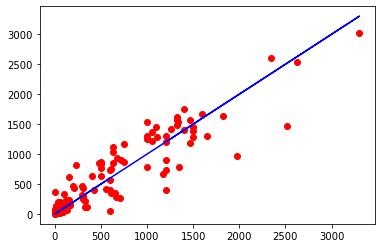

In [95]:
eval(h_rfr)

In [ ]:
we are able to increase the accuracy from  to .So we will go with hypertuned svc() model.

# ii) Prediction and model building for Fuel_type

In [ ]:
X_1 = df.drop("Fuel_type",axis=1)
y1 = df.Fuel_type